In [1]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 


In [3]:
!curl https://data.cityofnewyork.us/resource/waf7-5gvc.csv > nyc_water_consumption.csv
import os

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1324    0  1324    0     0   8803      0 --:--:-- --:--:-- --:--:--  8826


In [4]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/hl3282/PUIdata


In [5]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/hl3282/PUIdata


In [6]:
# move the data
!mv nyc_water_consumption.csv $PUIDATA

In [7]:
#test if the data is there
!ls $PUIDATA

nyc_water_consumption.csv


## read in the data with pandas

In [8]:
#read in the data with pandas
import pandas as pd
WCINYC=pd.read_csv("%s/nyc_water_consumption.csv"%os.getenv("PUIDATA"))

In [9]:
#print the fist 8 lines out
WCINYC.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


In [10]:
#print the last 3 lines out
WCINYC.tail(3)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
36,7506166.0,1368.5,182,1993
37,8041649.0,1135.6,141,2002
38,7570458.0,1357.7,179,1994


In [11]:
#look at the columns available, those are the variables
WCINYC.columns

Index(['new_york_city_population', 'nyc_consumption_million_gallons_per_day',
       'per_capita_gallons_per_person_per_day', 'year'],
      dtype='object')

In [12]:
#count how many rows, those are the data points
WCINYC.size

156

In [13]:
#select 2 columns only for plotting
WCINYC_2c=WCINYC[['new_york_city_population', 'nyc_consumption_million_gallons_per_day']]

In [14]:
WCINYC_2c.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0
7,7319246.0,1351.0


## plot the data

In [15]:
import matplotlib.pyplot as plt
import numpy as np
WCINYC_2c.plot(x="new_york_city_population", y="nyc_consumption_million_gallons_per_day")
plt.show

<function matplotlib.pyplot.show>

In [16]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'NYC water Consumption')

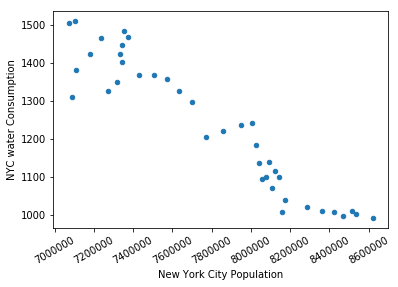

In [18]:
WCINYC_2c.plot(x="new_york_city_population", y="nyc_consumption_million_gallons_per_day", kind='scatter', rot=30);
plt.xlabel("New York City Population")
plt.ylabel("NYC water Consumption")

# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: 
number of NYC water consumption against New York City Population as reported by the New York City Water Supply System between 1979 and 2017. The two variables display a negative correlation. It's interesting that with the increase of population, water consumption decreases. I think it is probably because of awareness of environmentak protection strenghthening.

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [19]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [20]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [21]:
# print it out
df.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


In [22]:
df.tail(5)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
34,7633040.0,1325.7,174,1995
35,8622698.0,990.2,115,2017
36,7506166.0,1368.5,182,1993
37,8041649.0,1135.6,141,2002
38,7570458.0,1357.7,179,1994


In [23]:
#now select a date and 2 variables
dhs_3c= df[['year',
            'new_york_city_population',
            'nyc_consumption_million_gallons_per_day']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [24]:
dhs_3c.rename(columns = {'year':'Year',
                         'new_york_city_population':'New York City Population',
                         'nyc_consumption_million_gallons_per_day':'NYC Consumption(Million gallons per day)'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Text(0,0.5,'NYC population')

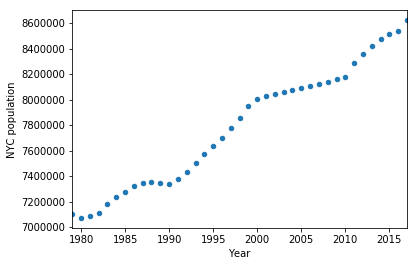

In [25]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Year', y='New York City Population', xlim=(1979,2017),kind='scatter')
ax.set_ylabel("NYC population")

Figure 2: number of New York City Population as a function of time between 1979 and 2017. The number peaks in 2017. there is a positive(increasing)trend. It is obvious that population will increase as time goes.

Text(0,0.5,'NYC water Consumption')

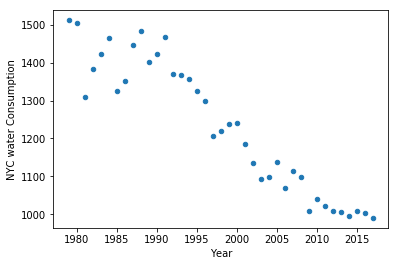

In [26]:
#plot the other columns
ax = dhs_3c.plot(x='Year', y='NYC Consumption(Million gallons per day)',kind='scatter')
ax.set_ylabel("NYC water Consumption")

Figure 3: number of NYC water consumption against New York City Population as reported by the New York City Water Supply System between 1979 and 2017. Unlike the number of New York City Population, there is a decreasing trend in the NYC water consumption as time goes. Although during several years it increases, in general the trend is decreasing. It indictaes that the number of water resources decreases and people's awareness of environmental protection is strenghthening.